Using Python, create a line chart with both the daily and 7-day moving average for the close price for Tesla stock. You can download a CSV with the current prices [here](https://finance.yahoo.com/quote/tsla/history/).

In [1]:
#Importing packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline

In [2]:
#retrieved and named the dataframe
df = pd.read_csv('./TSLA.csv')

In [3]:
#using to see all of the columns when I retrieve the head and describe
pd.set_option('display.max_columns', 999)

In [4]:
#examine the dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
1,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
2,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
3,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
4,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-05-26,607.559998,626.169983,601.500000,619.130005,619.130005,28639300
248,2021-05-27,620.239990,631.130005,616.210022,630.849976,630.849976,26370600
249,2021-05-28,628.500000,635.590027,622.380005,625.219971,625.219971,22737000
250,2021-06-01,627.799988,633.799988,620.549988,623.900024,623.900024,18084900
251,2021-06-02,620.130005,623.359985,599.140015,605.119995,605.119995,23233300


In [6]:
#calculating the 7 day moving average using the closing price
df['MovAvg'] = df['Close'].rolling(window=7).mean()

In [7]:
#examine dataframe again
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,MovAvg
0,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500,NaN
1,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500,NaN
2,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500,NaN
3,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500,NaN
4,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000,NaN
5,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000,NaN
6,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500,186.327999


In [8]:
#drop the first 7 rows that do not have a moving average
df = df.dropna()
df.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume,MovAvg
0,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500,186.327999
1,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000,187.822857
2,2020-06-15,183.557999,199.768005,181.699997,198.179993,198.179993,78486000,191.437712
3,2020-06-16,202.369995,202.576004,192.477997,196.425995,196.425995,70255500,194.193996
4,2020-06-17,197.542007,201.000000,196.514008,198.358002,198.358002,49454000,195.390283
...,...,...,...,...,...,...,...,...
241,2021-05-26,607.559998,626.169983,601.500000,619.130005,619.130005,28639300,591.321437
242,2021-05-27,620.239990,631.130005,616.210022,630.849976,630.849976,26370600,598.890006
243,2021-05-28,628.500000,635.590027,622.380005,625.219971,625.219971,22737000,607.712856
244,2021-06-01,627.799988,633.799988,620.549988,623.900024,623.900024,18084900,613.015712


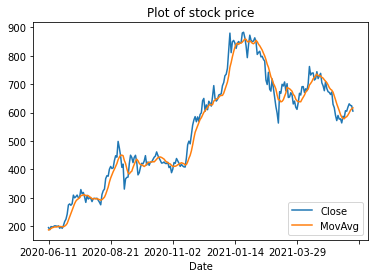

In [9]:
#create chart
chart = df.plot(x='Date', y=['Close','MovAvg'], kind='line',\
                     legend=False, title='Plot of stock price')
plt.legend(loc='lower right')
plt.show()